
--- Descriptive Statistics ---
       Hours_Studied   Exam_Score
count    6607.000000  6607.000000
mean       19.975329    67.235659
std         5.990594     3.890456
min         1.000000    55.000000
25%        16.000000    65.000000
50%        20.000000    67.000000
75%        24.000000    69.000000
max        44.000000   101.000000


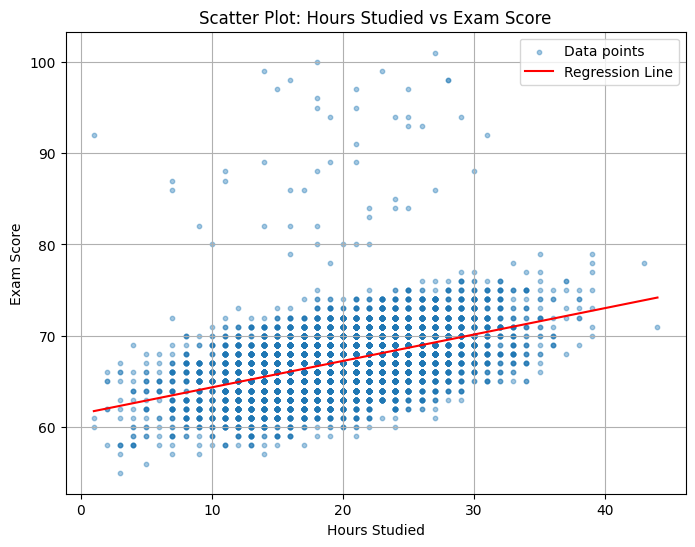


Pearson correlation: r = 0.4455, p-value = 1.2863e-319

--- OLS Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1635.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):          1.29e-319
Time:                        14:03:39   Log-Likelihood:                -17620.
No. Observations:                6607   AIC:                         3.524e+04
Df Residuals:                    6605   BIC:                         3.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

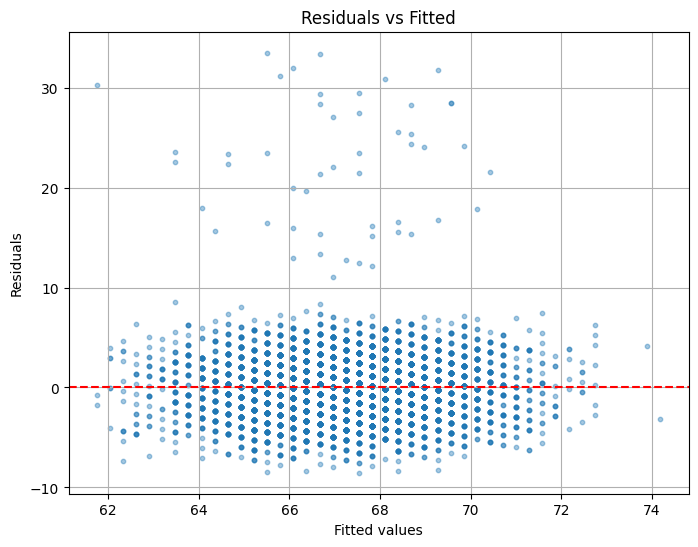

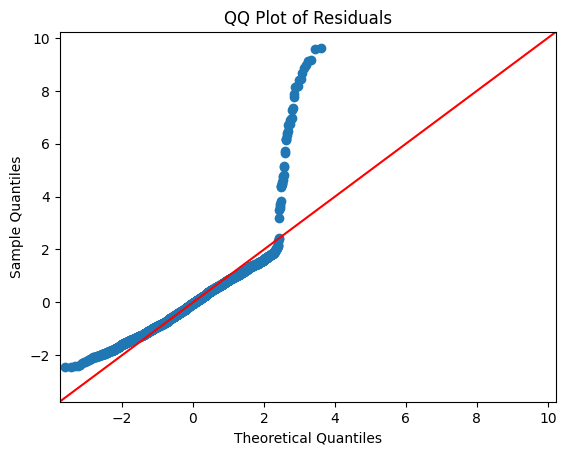


Breusch-Pagan Test:
LM stat = 0.6617, LM p-value = 0.4160
F stat = 0.6616, F p-value = 0.4160

Shapiro-Wilk Test (n=500 sample): stat = 0.8434, p-value = 7.9661e-22

--- Conclusion ---
Slope = 0.2893, p-value = 0.0000e+00, R² = 0.1984
✅ Reject H₀ → Hours_Studied significantly affects Exam_Score (positive relationship).
✅ No strong evidence of heteroscedasticity.
⚠️  Residuals deviate from normality (p < 0.05).


In [1]:
# 📘 Hypothesis Testing in Python
# Hypothesis:
# H0: Hours_Studied has no effect on Exam_Score
# H1: Hours_Studied positively affects Exam_Score

# ---------------------------
# Import necessary libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# 1️⃣ Load the dataset
# ---------------------------
df = pd.read_csv("StudentPerformanceFactors.csv")

# Select relevant columns
data = df[["Hours_Studied", "Exam_Score"]].dropna()

# ---------------------------
# 2️⃣ Descriptive Statistics
# ---------------------------
print("\n--- Descriptive Statistics ---")
print(data.describe())

# ---------------------------
# 3️⃣ Scatter Plot with Regression Line
# ---------------------------
x = data["Hours_Studied"].values
y = data["Exam_Score"].values

# Fit regression line (for plot)
slope, intercept = np.polyfit(x, y, 1)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.4, s=10, label="Data points")
plt.plot(np.sort(x), intercept + slope*np.sort(x), color='red', label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Scatter Plot: Hours Studied vs Exam Score")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 4️⃣ Correlation Test
# ---------------------------
pearson_r, pearson_p = stats.pearsonr(x, y)
print(f"\nPearson correlation: r = {pearson_r:.4f}, p-value = {pearson_p:.4e}")

# ---------------------------
# 5️⃣ Simple Linear Regression
# ---------------------------
X = sm.add_constant(data["Hours_Studied"])   # add intercept
model = sm.OLS(data["Exam_Score"], X).fit()

print("\n--- OLS Regression Summary ---")
print(model.summary())

# ---------------------------
# 6️⃣ Residual Diagnostics
# ---------------------------
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted
plt.figure(figsize=(8,6))
plt.scatter(fitted, residuals, alpha=0.4, s=10)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.grid(True)
plt.show()

# QQ Plot of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

# ---------------------------
# 7️⃣ Heteroscedasticity Test
# ---------------------------
bp_test = het_breuschpagan(residuals, X)
print("\nBreusch-Pagan Test:")
print(f"LM stat = {bp_test[0]:.4f}, LM p-value = {bp_test[1]:.4f}")
print(f"F stat = {bp_test[2]:.4f}, F p-value = {bp_test[3]:.4f}")

# ---------------------------
# 8️⃣ Normality of Residuals
# ---------------------------
# sample of 500 for Shapiro-Wilk (too large otherwise)
shapiro_stat, shapiro_p = stats.shapiro(residuals.sample(500, random_state=1))
print(f"\nShapiro-Wilk Test (n=500 sample): stat = {shapiro_stat:.4f}, p-value = {shapiro_p:.4e}")

# ---------------------------
# 9️⃣ Final Conclusion
# ---------------------------
alpha = 0.05
slope_coef = model.params["Hours_Studied"]
slope_p = model.pvalues["Hours_Studied"]
r2 = model.rsquared

print("\n--- Conclusion ---")
print(f"Slope = {slope_coef:.4f}, p-value = {slope_p:.4e}, R² = {r2:.4f}")

if slope_p < alpha:
    print("✅ Reject H₀ → Hours_Studied significantly affects Exam_Score (positive relationship).")
else:
    print("❌ Fail to reject H₀ → No significant effect of Hours_Studied on Exam_Score.")

if bp_test[1] < alpha:
    print("⚠️  Heteroscedasticity detected (non-constant variance).")
else:
    print("✅ No strong evidence of heteroscedasticity.")

if shapiro_p < alpha:
    print("⚠️  Residuals deviate from normality (p < 0.05).")
else:
    print("✅ Residuals approximately normal.")
